In [1]:
import torch
import torch.nn as nn # neural network module
import numpy as np
from sklearn import datasets # to load a binary classification dataset
from sklearn.preprocessing import StandardScaler # to scale features
from sklearn.model_selection import train_test_split #separation of training and testing data

# prepare data
bc = datasets.load_breast_cancer() #breast cancer data for binary classification problem to predict cancer based on input features
X,y = bc.data, bc.target #X = independent variables(input features), y= dependent variables(what you want to predict)

n_samples, n_features = X.shape
print(n_samples,n_features) #num of rows = samples, num of columns = features

"""" So, after this line of code is executed,
 n_samples will be the number of samples in your dataset,
and n_features will be the number of features (independent variables) in each sample. """

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=1234)

# scale (Normalization Step)
sc = StandardScaler() # make our features have zero mean and unit variance
X_train = sc.fit_transform(X_train) # appropriately scales the training data
X_test= sc.transform(X_test) # no need to fit as scaling parameters for X_train has been learned and you don't want to introduce new parameters

# convert to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32)) # convert to a tensor of float 32 datatype to avoid errors
X_test = torch.from_numpy(X_test.astype(np.float32)) # convert to a tensor of float 32 datatype to avoid errors
y_train = torch.from_numpy(y_train.astype(np.float32)) # convert to a tensor of float 32 datatype to avoid errors
y_test = torch.from_numpy(y_test.astype(np.float32)) # convert to a tensor of float 32 datatype to avoid errors

#ensure compatibility with the loss function etc. we are going to use
y_train = y_train.view(y_train.shape[0], 1) # make into a column vector
y_test = y_test.view(y_test.shape[0],1) # make into a column vector


# model
# linear combination of weights and biases: f = wx+b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self) .__init__()
        self.linear = nn.Linear(n_input_features, 1) # linear network with n input features and 1 output feature since it is a classification model

    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
model = LogisticRegression(n_features)

acc_list = []
# loss and optimizer
# loss is calculated using binary cross entropy loss (useful for binary classification)
learning_rate = 0.01
criterion = nn.BCELoss(reduction= 'mean') # specified the reduction here, optional
# parameters are the learnable weights and biases in the model
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate) # stochastic gradient descent. less computationally expensive than regular GD
# training loop
num_epochs = 300
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train) # forward pass with input data X_train
    loss =  criterion(y_predicted, y_train)

    # backward pass
    loss.backward() # calculate loss
    # updates
    optimizer.step() # Pytorch will do all the updates for us

    # zero gradients. Empty the gradients
    optimizer.zero_grad()

    # print info for every 10th step
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        # Evaluate model
        with torch.no_grad(): # disable gradient calculation for evaluation
         y_predicted = model(X_test)
         y_predicted_cls = y_predicted.round() # rounds predicted value to nearest integer.if greater than 0.5, return (round to) a +1. cls-- classes
         acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0]) # denominator is the number of test samples
         acc_list.append(acc.item())
         print(f'accuracy = {acc:.4f}') # print accuracy


569 30
epoch: 10, loss = 0.6540
accuracy = 0.7807
epoch: 20, loss = 0.5079
accuracy = 0.9123
epoch: 30, loss = 0.4243
accuracy = 0.9123
epoch: 40, loss = 0.3708
accuracy = 0.9298
epoch: 50, loss = 0.3335
accuracy = 0.9298
epoch: 60, loss = 0.3058
accuracy = 0.9298
epoch: 70, loss = 0.2842
accuracy = 0.9298
epoch: 80, loss = 0.2668
accuracy = 0.9123
epoch: 90, loss = 0.2524
accuracy = 0.9123
epoch: 100, loss = 0.2403
accuracy = 0.9123
epoch: 110, loss = 0.2298
accuracy = 0.9123
epoch: 120, loss = 0.2207
accuracy = 0.9123
epoch: 130, loss = 0.2127
accuracy = 0.9123
epoch: 140, loss = 0.2055
accuracy = 0.9123
epoch: 150, loss = 0.1991
accuracy = 0.9123
epoch: 160, loss = 0.1932
accuracy = 0.9123
epoch: 170, loss = 0.1879
accuracy = 0.9123
epoch: 180, loss = 0.1830
accuracy = 0.9123
epoch: 190, loss = 0.1785
accuracy = 0.9123
epoch: 200, loss = 0.1744
accuracy = 0.9123
epoch: 210, loss = 0.1705
accuracy = 0.9123
epoch: 220, loss = 0.1669
accuracy = 0.9123
epoch: 230, loss = 0.1636
accuracy

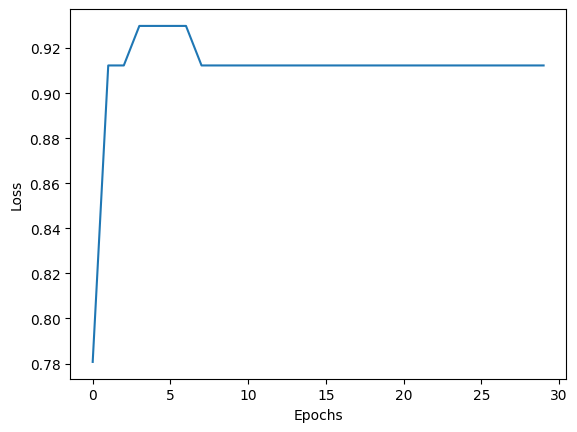

In [2]:
# plot the epoch and accuracy
import matplotlib.pyplot as plt
plt.plot(range(30), acc_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()